## UFRJ | Cálculo Numérico | 2021.2

### Tarefa 4 | Gabriele Jandres | 119159948

#### Discussões com: Carlos Bravo, Victor Cardoso

In [1]:
using Plots
using Random
using Polynomials
using LinearAlgebra

### Exercício 1.1 | Revisão de conceitos

_________________________________________________________________________________________________________________________________________________________________________________________

Na última tarefa o método de Newton foi escolhido, então dentre os quatro restantes escolhi o método da bisseção e a interpolação polinomial de grau 1 e 2.

#### 1.1.1 | Bisseção

Queremos aproximar ln(3) utilizando o método da bisseção com intervalo menor que 10^(-3). Mas temos que considerar que apenas sabemos calcular $e^x$ para qualquer x, todas as propriedades de ln e todas as suas derivadas.
    
Como queremos saber $x = ln(3)$, pelas propriedades de ln sabemos que isso é o mesmo que saber $x$ tal que $e^x = 3$. Podemos então escrever uma função f tal que $f(x) = e^x - 3$ e queremos achar $f(x) = 0$. Para isso vamos utilizar as seguintes funções:

In [2]:
# Função auxiliar para a função do método da bisseção. Verifica se a função tem sinais opostos nos extremos do intervalo dado
# -- Parâmetros --
# a: ponto inicial do intervalo
# b: ponto final do intervalo

function tem_sinais_opostos(f, a, b) #função recebe f(a) e f(b) não nulos
    return f(a) * f(b) < 0
end

tem_sinais_opostos (generic function with 1 method)

In [3]:
# Função auxiliar para a função do método da bisseção. Verifica se a é uma raiz da função f
# -- Parâmetros --
# a: valor arbitrário

function eh_raiz(f, a)
    return f(a) == 0
end

eh_raiz (generic function with 1 method)

In [4]:
# Função auxiliar para a função do método da bisseção. Faz a média entre x e y
# -- Parâmetros --
# x e y: valores arbitrários

function media(x, y)
    return (x + y) / 2
end

media (generic function with 1 method)

In [5]:
# Função com o método da bisseção e newton para calcular aproximações

# -- Parâmetros --
# f: função a ser aproximada
# a: ponto inicial do intervalo
# b: ponto final do intervalo
# erro: erro máximo 

function bissecao(f, a, b, tamanho_final_do_intervalo) 
    iteracoes = floor(log2( (b - a) / tamanho_final_do_intervalo)) + 1
    
    if eh_raiz(f, a) # se a for raiz da função então a eh uma aproximação
        return a
    end
    if eh_raiz(f, b) # se b for raiz da função então a eh uma aproximação
        return b
    end
    if !(tem_sinais_opostos(f, a, b)) # a e b precisam ter sinais opostos por causa do TVI
        return "Não tem sinais opostos"
    end
    
    for i = 1:iteracoes
        m = media(a, b)
        
        if eh_raiz(f, m)
            return m
        end
        
        if tem_sinais_opostos(f, a, m) # se a e m tiverem sinais opostos, m será o novo final do intervalo
            b = m
        else
            a = m # se b e m tiverem sinais opostos, m será o novo início do intervalo
        end
    end
    
    x_final = media(a, b)
    return x_final
end

bissecao (generic function with 1 method)

Vamos então utilizar a função de bisseção acima com a função f que definimos, com o intervalo de 0,5 até 2, já que sabemos que $e \approx 2,71$ e $ln(e) = 1$ e por isso $ln(3)$ deve ser um pouco maior do que 1. Como queremos que o intervalo final tenha tamanho menor do que $10^{-3}$, vamos considerar um intervalo final de tamanho $10^{-4}$:

In [6]:
f(x) = MathConstants.e^x - 3 # pelas propriedades de ln, isso é o mesmo que calcular ln(3)
a = 0.5
b = 2
tam = 1e-4 # tamanho final de intervalo menor do que 10^(-3)

bissecao(f, a, b, tam)

1.0986175537109375

Utilizando a função implementada acima, descobrimos que $x = ln(3) \approx 1.0986175537109375$.

#### 1.1.4 | Interpolação polinomial de grau 1

Queremos aproximar ln(3) utilizando interpolação polinomial. Já que queremos interpolação polinomial de grau 1, devemos ter dois pontos.

Pelas propriedades, sabemos que ln(e^1) = ln(e) = 1 e ln(e^2) = 2. Daí tiramos nossos dois pontos:

In [7]:
x = [MathConstants.e, MathConstants.e^2]
y = [1, 2]

2-element Vector{Int64}:
 1
 2

Criando uma função de interpolação de grau 1:

In [8]:
# Função para gerar os coeficientes do polinômio interpolador de uma função

# -- Parâmetros --
# x: conjunto de valores de x
# y: conjunto de valores de y

function interpolacao(x, y)
    V = [x.^0 x.^1] # matriz de Vandermonde
    c = V \ y # resolve o sistema linear Vc = y
    return c # vetor de coeficientes
end

interpolacao (generic function with 1 method)

In [9]:
c = interpolacao(x, y)

2-element Vector{Float64}:
 0.4180232931306737
 0.21409726569788406

In [10]:
# Função auxiliar para avaliar um polinômio

# -- Parâmetros --
# c: conjunto dos coeficientes do polinômio
# x: ponto de interesse

function avaliar_um_polinomio(c, x)
    V = [x.^0 x.^1]
    y = V * c
    return y
end

avaliar_um_polinomio (generic function with 1 method)

Podemos utilizar agora a função auxiliar para avaliar um polinômio passando o valor $3$, para descobrirmos ln(3):

In [11]:
avaliar_um_polinomio(c, 3)

1-element Vector{Float64}:
 1.060315090224326

Utilizando a função implementada acima, descobrimos que $x = ln(3) \approx 1.060315090224326$.

Para calcular o erro máximo, vamos considerar a fórmula para cálculo do erro na interpolação dada em aula. Se $f^{(n+1)}(x) <= M$ no intervalo, então:

$$|\text{erro}| \leq \frac{M}{(n+1)!}\prod|x-x_i|$$
onde $x_i$ são os pontos interpolados

Já que temos $n = 1$, vamos usar o módulo da segunda derivada de $ln$, que é $|\frac{-1}{x^2}|$. No intervalo $[e, e^2]$, o maior valor possível de $M$ será $|\frac{1}{e^2}|$. Utilizando esses dados com a função abaixo (construída com base na fórmula), vamos ter:

In [12]:
# Função para calcular o erro da interpolação

# -- Parâmetros --
# x: conjunto de pontos x que conhecemos
# M: valor máximo da derivada no intervalo
# n: tamanho do intervalo
# valor: valor de x de interesse

function erro_interpolacao(x, M, n, valor)
   erro = M / factorial(n + 1)

    for i = 1:(n + 1) 
        erro = erro * (valor - x[i])
    end 
    
    return abs(erro)
end

erro_interpolacao (generic function with 1 method)

In [13]:
x = [MathConstants.e; MathConstants.e^2] # conjunto de pontos que sabemos
M = 1/ MathConstants.e^2  # valor máximo da derivada no intervalo [e, e^2]
n = 1 # grau
val = 3 # x que temos interesse

erro_grau1 = erro_interpolacao(x, M, n, val)

println(erro_grau1)

0.08366947296288381


Assim, descobrimos que o erro máximo nesse caso é de $0.08366947296288381$.

#### 1.1.5 | Interpolação polinomial de grau 2

Queremos aproximar ln(3) utilizando interpolação polinomial. Já que queremos interpolação polinomial de grau 2, devemos ter três pontos. Pelas propriedades, sabemos que ln(e^1) = ln(e) = 1, ln(e^(1/2)) = 1/2 e ln(e^2) = 2. Daí tiramos nossos três pontos:

In [14]:
x = [MathConstants.e; MathConstants.e^(1/2); MathConstants.e^2]
y = [1; 1/2; 2]

3-element Vector{Float64}:
 1.0
 0.5
 2.0

In [15]:
# Função para gerar os coeficientes do polinômio interpolador de grau 2 de uma função

# -- Parâmetros --
# x: conjunto de valores de x
# y: conjunto de valores de y

function interpolacao(x, y)
    V = [x.^0 x.^1 x.^2] # matriz de Vandermonde
    c = V \ y # resolve o sistema linear Vc = y
    return c # vetor de coeficientes
end

interpolacao (generic function with 1 method)

In [16]:
c = interpolacao(x, y)

3-element Vector{Float64}:
 -0.46857353309013866
  0.6602458432656465
 -0.044141056801786795

In [17]:
# Função auxiliar para avaliar um polinômio de grau 2

# -- Parâmetros --
# c: conjunto dos coeficientes do polinômio
# x: ponto de interesse

function avaliar_um_polinomio(c, x)
    V = [x.^0 x.^1 x.^2]
    y = V * c
    return y
end

avaliar_um_polinomio (generic function with 1 method)

Podemos utilizar agora a função auxiliar para avaliar um polinômio passando o valor $3$, para descobrirmos ln(3):

In [18]:
avaliar_um_polinomio(c, 3)

1-element Vector{Float64}:
 1.11489448549072

Utilizando a função implementada acima, descobrimos que $x = ln(3) \approx 1.11489448549072$.

Podemos calcular o erro máximo usando novamente a função erro_interpolacao criada acima. Nesse caso também vamos ter um intervalo de $e$ a $e^2$, $n = 2$ e o módulo da terceira derivada será $|\frac{2}{x^3}|$, com valor máximo $\frac{2}{e^3}$ quando $x = e$. Então teremos:

In [19]:
x = [MathConstants.e; MathConstants.e^(1/2); MathConstants.e^2]
M = 2 / MathConstants.e^3 # valor máximo da derivada no intervalo 
n = 2 # grau
val = 3 # x que temos interesse

erro_grau2 = erro_interpolacao(x, M, n, val)

println(erro_grau2)

0.027728490824065418


Assim, descobrimos que o erro máximo nesse caso é de $0.027728490824065418$.

### Exercício 1.2 | Escolhendo o polinômio correto

_________________________________________________________________________________________________________________________________________________________________________________________

#### 1.2.1 | Gerando 30 pontos aleatórios

Primeiramente, vamos gerar 30 pontos aleatórios de um polinômio de grau 5:

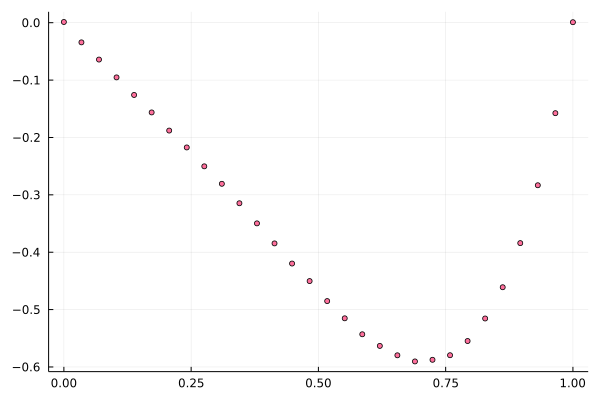

In [20]:
Random.seed!(10)

# Gerando pontos x 
n = 30
x = range(0, 1, length=n)

# Potências de x
ϕ1(x) = x^5
ϕ2(x) = x^4
ϕ3(x) = x^3
ϕ4(x) = x^2
ϕ5(x) = x

# Polinômio de grau 5, os pontos serão aleatórios
y = ϕ1.(x) + 2 * ϕ2.(x) - 3 * ϕ3.(x) + ϕ4.(x) - ϕ5.(x) + randn(n) * 0.001 # ruído, ele eh adicionado para não zerar ao chegar no grau 5

# Plotando os 30 pontos aleatórios
scatter(x, y, c=:"#ff6f9c", ms=3, leg=false)

Ao adicionar ruído, percebemos a presença de alguns outliers, que dificultam um pouco as aproximações feitas por meio da regressão.

#### 1.2.2 | Regressão polinomial

Para construir a função de regressão, vamos utilizar a função auxiliar abaixo para construir a matriz de Vandermonde:

In [21]:
# Função auxiliar para construir a matriz de Vandermonde

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# grau: grau que desejamos para ser uma das dimensões da matriz

function vandermonde(x, grau)
    n, = size(x) # quantidade de pontos
    V = zeros(n, grau + 1) # criamos uma matriz n X (grau + 1)
    
    # preenchemos a matriz criada
    for i = 1:n
        for j = 1:(grau + 1)
            V[i, j] = x[i] ^ (j - 1)
        end
    end
    
    return V
end

vandermonde (generic function with 1 method)

Utilizando a técnica de mínimos quadrados e a função de regressão construída em aula, teremos:

In [22]:
# Função para calcular a regressão polinomial

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# y: conjunto dos pontos do eixo y
# grau: o grau desejado para o polinômio calculado

function regressao(x, y, grau)
    V = vandermonde(x, grau) # construímos a matriz de Vandermonde
    c = V \ y # mínimos quadrados para obtenção dos coeficientes do polinômio, resolve o sistema Vc = y
    return c
end

regressao (generic function with 1 method)

Como queremos realizar a regressão polinomial de grau 0 até 29, vamos construir um laço com índices de 0 a 29 e utilizar a função de regressão para obtermos os coeficientes dos polinômios:

In [23]:
graficos = [] # array com os gráficos para serem plotados

for i = 0:29
    c = regressao(x, y, i) # obtemos os coeficientes do polinômio de grau i 
    modelo = Polynomial(c) # construímos o polinômio utilizando os coeficientes que descobrimos
    
    print("Grau ", i, ": ", modelo, "\n \n")
    
    plot_pontos = plot(x, y, label = false, seriestype = :scatter, c =:"#ff6f9c", size = (500, 500)) # plot dos pontos
    plot!(x, modelo.(x), label = "Polinômio grau $i", c =:"black") # plot do polinômio
    
    push!(graficos, plot(plot_pontos)) # adiciona o plot completo (pontos e polinômio) no array de graficos
end

Grau 0: -0.337657
 
Grau 1: -0.164178 - 0.346958*x
 
Grau 2: 0.121747 - 2.12378*x + 1.77682*x^2
 
Grau 3: -0.0485138 + 0.110779*x - 3.90529*x^2 + 3.78807*x^3
 
Grau 4: 0.00345294 - 1.11595*x + 1.83503*x^2 - 5.23911*x^3 + 4.51359*x^4
 
Grau 5: 0.000661839 - 1.00658*x + 1.01749*x^2 - 3.00682*x^3 + 1.98271*x^4 + 1.01235*x^5
 
Grau 6: 0.00121351 - 1.04108*x + 1.39718*x^2 - 4.58374*x^3 + 4.98752*x^4 - 1.64727*x^5 + 0.886541*x^6
 
Grau 7: 0.000741047 - 0.994509*x + 0.682999*x^2 - 0.405445*x^3 - 6.78833*x^4 + 15.5082*x^5 - 11.5586*x^6 + 3.55576*x^7
 
Grau 8: 0.000794716 - 1.00291*x + 0.855305*x^2 - 1.7538*x^3 - 1.56619*x^4 + 4.46018*x^5 + 1.44157*x^6 - 4.43068*x^7 + 1.99661*x^8
 
Grau 9: 0.000976494 - 1.04926*x + 2.0841*x^2 - 14.1252*x^3 + 61.1085*x^4 - 174.806*x^5 + 303.812*x^6 - 302.5*x^7 + 160.755*x^8 - 35.2796*x^9
 
Grau 10: 0.00113888 - 1.11962*x + 4.42153*x^2 - 43.4617*x^3 + 248.526*x^4 - 865.844*x^5 + 1861.36*x^6 - 2482.05*x^7 + 2008.07*x^8 - 903.567*x^9 + 173.657*x^10
 
Grau 11: 0.001

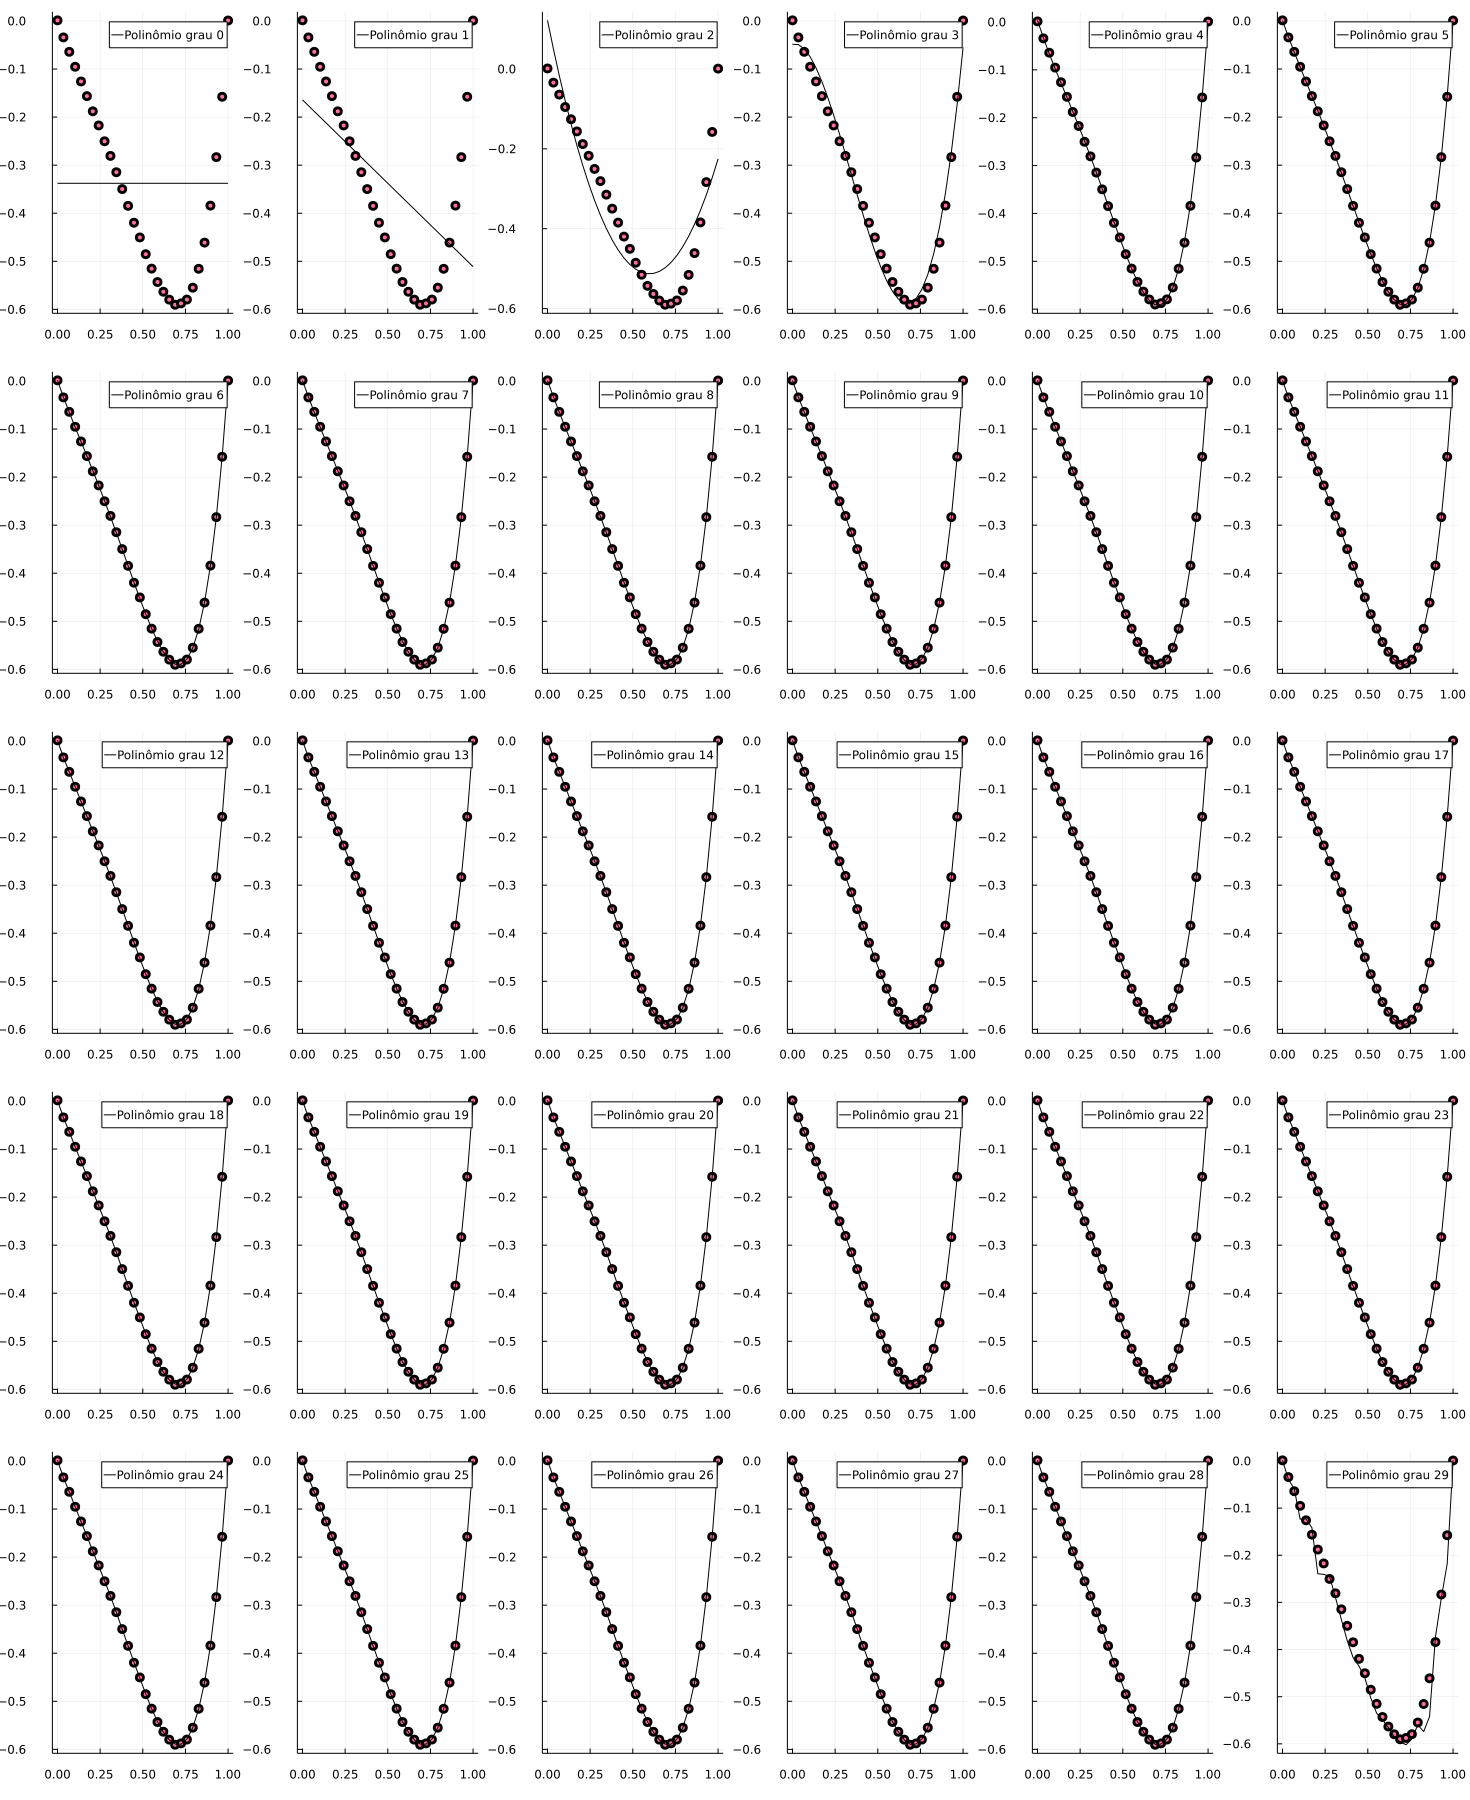

In [24]:
# Plot dos polinômios e dos pontos
plot(graficos..., size=(1470, 1800))

#### 1.2.3 | Regressão com polinômio de grau maior que 29

É possível fazer regressão com grau maior que 29 mas não é necessário. É de fato verdade que quanto mais graus, mais liberdade damos para que a função passe por todos os pontos. Porém quando chegamos no grau 29 com 30 pontos, teremos também 30 coeficientes, o que faz com que o polinômio abarque todos os pontos, e com isso, na teoria, nosso erro deveria ser 0. Aumentar o grau acima de 29 seria dar uma liberdade desnecessária, o que poderia vir a aumentar o erro ao invés de diminui-lo (no caminho natural devemos ter $erro_{grau} > erro_{grau + 1}$). Plotando o gráfico do grau 29, esperamos que o polinômio passe por todos os pontos, porém temos como resultado:

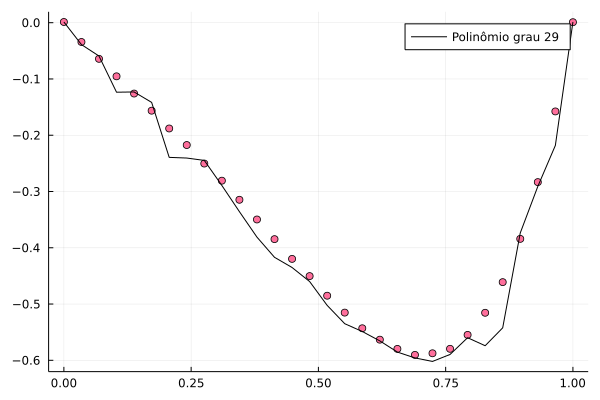

In [25]:
c = regressao(x, y, 29) # obtemos os coeficientes do polinômio de grau 29 
modelo = Polynomial(c) # construímos o polinômio utilizando os coeficientes que descobrimos

plot(x, y, label = false, seriestype = :scatter, c =:"#ff6f9c") # plot dos pontos
plot!(x, modelo.(x), label = "Polinômio grau 29", c =:"black") # plot do polinômio

Com isso percebemos que nossa expectativa inicial de erro = 0 com grau 29 não foi satisfeita. Podemos dizer que ela só seria satisfeita em um mundo ideal, sem que houvesse ruído em y e considerando que não existissem as limitações de representação de float em Julia. O ruído acaba ocasionando outliers que dificultam a aproximação computacional pelo método numérico.

Vamos agora partir para demonstração do erro nas proximidades de 29. Para isso vamos usar a função de erro_total para encontrar o erro de determinado modelo polinomial (função constante, reta, parábola, cúbica, etc):

In [26]:
# Função para calcular o erro total de um modelo obtido com regressão polinomial

# -- Parâmetros --
# x: conjunto dos pontos do eixo x
# y: conjunto dos pontos do eixo y
# modelo: o polinômio calculado com auxílio da regressão

function erro_total(x, y, modelo)
    n, = size(x) # quantidade de pontos
    soma = 0 # variável para armazenar a soma dos erros individuais de cada ponto
    for i = 1:n
        soma = soma + (y[i] - modelo(x[i]))^2
    end
    return sqrt(soma)  
end

erro_total (generic function with 1 method)

Vamos calcular o erro pros graus 28, 29 e 30:

In [27]:
c = regressao(x, y, 28) # obtemos os coeficientes do polinômio de grau 28 
modelo = Polynomial(c) # construímos o polinômio utilizando os coeficientes que descobrimos

print(28, ": ", erro_total(x, y, modelo), "\n")

c = regressao(x, y, 29) # obtemos os coeficientes do polinômio de grau 29 
modelo = Polynomial(c) # construímos o polinômio utilizando os coeficientes que descobrimos
    
print(29, ": ", erro_total(x, y, modelo), "\n")

c = regressao(x, y, 30) # obtemos os coeficientes do polinômio de grau 30 
modelo = Polynomial(c) # construímos o polinômio utilizando os coeficientes que descobrimos
    
print(30, ": ", erro_total(x, y, modelo), "\n")

28: 0.00333569996828539
29: 0.14865043919712412
30: 0.003392211140073682


Percebemos que o erro no grau $29$ não é 0, como esperávamos, devido à presença do ruído e da imprecisão na representação de números float pelo Julia. Porém percebemos que é possível fazer a regressão com um polinômio de grau maior que 29, o Julia consegue calcular e inclusive conseguimos plotar o polinômio:

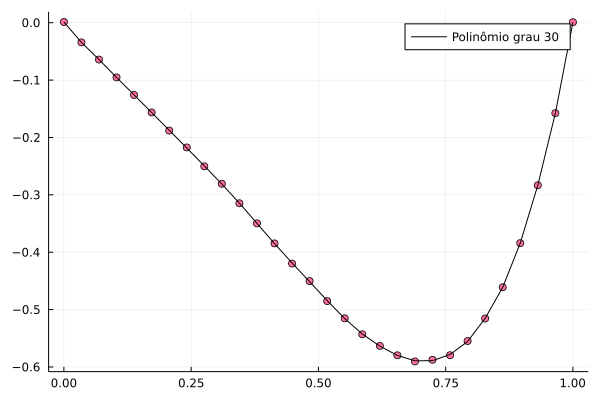

In [28]:
c = regressao(x, y, 30) # obtemos os coeficientes do polinômio de grau 30 
modelo = Polynomial(c) # construímos o polinômio utilizando os coeficientes que descobrimos

plot(x, y, label = false, seriestype = :scatter, c =:"#ff6f9c") # plot dos pontos
plot!(x, modelo.(x), label = "Polinômio grau 30", c =:"black") # plot do polinômio

#### 1.2.4 | Plot do erro total por grau

Queremos realizar o plot do erro total por grau, então vamos utilizar um laço novamente para que possamos percorrer todos os graus. Com isso, vamos criar um conjunto de pontos do eixo x, que chamaremos de graus, e outro conjunto de pontos do eixo y, que chamaremos de erro (será o erro total do grau correspondente):

In [29]:
n = 30 # número de pontos que teremos no gráfico
grau = zeros(n) # eixo x
erro = zeros(n) # eixo y

for i = 0:29
    c = regressao(x, y, i) # obtemos os coeficientes do polinômio de grau i 
    modelo = Polynomial(c) # construímos o polinômio utilizando os coeficientes que descobrimos
    
    err = erro_total(x, y, modelo) # obtemos o erro total para o polinômio de grau i obtido com a regressão
    
    print(i, ": ", err, "\n")
    
    grau[i + 1] = i # armazenamos o grau
    erro[i + 1] = err # armazenamos o erro
end

0: 1.0602498786490522
1: 0.8957815676050682
2: 0.4507441601109955
3: 0.13290893246462
4: 0.009377895381134503
5: 0.00546498813854234
6: 0.005194825203028674
7: 0.004903188230182345
8: 0.004897278845498564
9: 0.004783237408731688
10: 0.0046135770864816515
11: 0.0045432260990351525
12: 0.004392875996375703
13: 0.004376706063994874
14: 0.004376249936685579
15: 0.004352245733521357
16: 0.003971113571075008
17: 0.003964617663582519
18: 0.003859188792744812
19: 0.003863111486154972
20: 0.0038558276827187475
21: 0.003854223736721739
22: 0.0038555385527394063
23: 0.003846158975701307
24: 0.0038228483913202065
25: 0.003784988197322449
26: 0.00374122787423466
27: 0.0033202784559743753
28: 0.00333569996828539
29: 0.14865043919712412


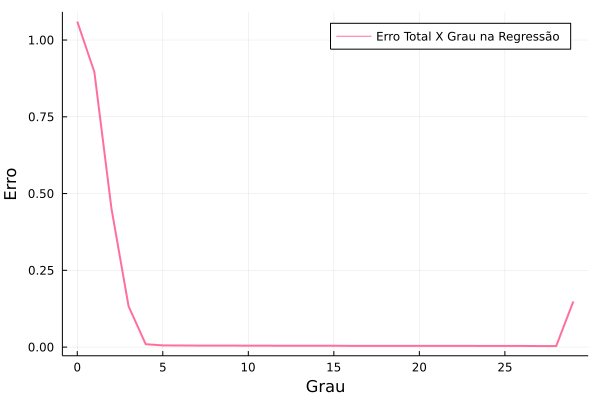

In [30]:
plot(grau, erro, 
    color=:"#ff6f9c",
    lw=2,
    label="Erro Total X Grau na Regressão", 
    legend=:topright,
    xlabel="Grau",
    ylabel="Erro"
)

Percebemos que o erro diminui drasticamente no começo à medida que o grau aumenta, mas apenas até chegar próximo do grau 5, que é o chamado cotovelo da curva. A partir do grau 5 o erro se mantém aproximadamente constante e vai caindo lentamente. Isso era de se esperar porque nossa função principal da letra a é um polinômio de grau 5, com a adição de ruído em y, o que faz com que o erro não seja exatamente 0 ao chegarmos no grau 5.

Observamos também que ocorre um crescimento súbito no erro no grau 29, que na teoria não deveria acontecer mas que pode ser causado pelo ruído juntamente a problemas de precisão na representação do erro.

### Exercício 1.3 | Filme preferido

_________________________________________________________________________________________________________________________________________________________________________________________

Queremos utilizar mínimos quadrados e a técnica da aula 14 para descobrir qual o filme favorito da turma. Primeiramente, vamos dar uma sigla para cada um dos 9 filmes para podermos representar as preferências em forma de um sistema linear:

Toy Story: $\textbf{TS}$

Rocky: $\textbf{R}$

De volta pro futuro: $\textbf{DF}$

Curtindo a vida adoidado: $\textbf{CV}$

Os incríveis: $\textbf{I}$

Duna: $\textbf{D}$

Batman Begins: $\textbf{BB}$

Harry Potter: $\textbf{HP}$

Shrek: $\textbf{S}$

Considerando as 14 batalhas demonstrando as preferências dos alunos, obtemos o seguinte sistema de equações, onde cada uma das batalhas (perguntas do formulário) é uma equação:

$
\begin{equation}
    \begin{cases}
        TS - R = 11 \\
        DF - CV = 3 \\
        I - D = 7 \\
        BB - HP = 2 \\
        S - D = 9 \\
        HP - R = 7 \\
        TS - DF = 5 \\
        I - HP = 5 \\
        CV - D = 2 \\
        DF - D = 2 \\
        S - R = 11 \\
        I - BB = 5 \\
        TS - BB = 3 \\
        I - CV = 7
    \end{cases}\,.
\end{equation}
$

Para que consigamos resolver esse sistema, precisamos fornecer também um valor absoluto para um dos filmes, tornando o sistema determinado. Por isso, vamos também considerar a equação $TS = 10$.

Temos então 9 variáveis, que são as siglas dos filmes e 15 equações. Como é o caso de termos mais equações (restrições) do que variáveis, precisamos utilizar a técnica dos mínimos quadrados para encontrar o filme preferido.

Vamos prosseguir montando a matriz com os coeficientes das nossas incógnitas.  

A ordem de representação nas colunas será:

$
\textbf{TS R DF CV I D BB HP S} 
$

Por exemplo, no primeiro caso, temos a equação $TS - R = 11$, logo a primeira coluna terá o valor 1, a segunda o valor -1 e todas as demais o valor 0 porque as demais variáveis não estão presentes na equação. Fazendo isso para todas as 15 equações obtemos a matriz:

In [31]:
A = [
        1 -1 0 0 0 0 0 0 0;
        0 0 1 -1 0 0 0 0 0;
        0 0 0 0 1 -1 0 0 0;
        0 0 0 0 0 0 1 -1 0;
        0 0 0 0 0 -1 0 0 1;
        0 -1 0 0 0 0 0 1 0;
        1 0 -1 0 0 0 0 0 0;
        0 0 0 0 1 0 0 -1 0;
        0 0 0 1 0 -1 0 0 0;
        0 0 1 0 0 -1 0 0 0;
        0 -1 0 0 0 0 0 0 1;
        0 0 0 0 1 0 -1 0 0;
        1 0 0 0 0 0 -1 0 0;
        0 0 0 -1 1 0 0 0 0;
        1 0 0 0 0 0 0 0 0      
]

15×9 Matrix{Int64}:
 1  -1   0   0  0   0   0   0  0
 0   0   1  -1  0   0   0   0  0
 0   0   0   0  1  -1   0   0  0
 0   0   0   0  0   0   1  -1  0
 0   0   0   0  0  -1   0   0  1
 0  -1   0   0  0   0   0   1  0
 1   0  -1   0  0   0   0   0  0
 0   0   0   0  1   0   0  -1  0
 0   0   0   1  0  -1   0   0  0
 0   0   1   0  0  -1   0   0  0
 0  -1   0   0  0   0   0   0  1
 0   0   0   0  1   0  -1   0  0
 1   0   0   0  0   0  -1   0  0
 0   0   0  -1  1   0   0   0  0
 1   0   0   0  0   0   0   0  0

Queremos resolver o problema $Ax \approx y$, onde x são as nossas incógnitas dos filmes e y são os resultados da batalha. Precisamos agora montar o vetor y com esses resultados:

In [32]:
y = [
        11;
        3;
        7;
        2;
        9;
        7;
        5;
        5;
        2;
        2;
        11;
        5;
        3;
        7;
        10
]

15-element Vector{Int64}:
 11
  3
  7
  2
  9
  7
  5
  5
  2
  2
 11
  5
  3
  7
 10

Finalmente, utilizando nossa matriz de coeficientes A e a matriz de resultados y, vamos utilizar a técnica de mínimos quadrados para resolver o sistema:

In [33]:
x = A \ y # mínimos quadrados, resolve Ax = y

9-element Vector{Float64}:
 10.0
 -0.9419496166484127
  5.3143483023001075
  3.4370208105147846
 10.490690032858707
  2.5060240963855387
  6.6276013143483015
  5.392113910186199
 10.78203723986856

Observando os resultados percebemos que o maior valor encontrado para uma incógnita é o valor de $S = 10.78203723986856$. Isso quer dizer que o filme favorito dos alunos é Shrek, sendo seguido por Os incríveis, com $I = 10.490690032858707$.

### Exercício 1.4 | Descobrindo o dia de um determinado peso

_________________________________________________________________________________________________________________________________________________________________________________________

Queremos descobrir, usando regressão, em qual dia o peso será de 110 quilos. Para isso, precisaremos criar um conjunto x de pontos correspondente aos dias e um conjunto y de pontos correspondente aos pesos. Como dia 26/10 foi o primeiro dia da pesagem, vamos considerá-lo como dia 0 e todos os outros dias serão contados tendo ele como referência:

In [34]:
# dias 
x = [0; 1; 2; 3; 4; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22;23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 48; 50; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 70; 71; 72; 73; 74; 76; 77; 78; 79; 80; 81; 82; 83] 

# pesos
y = [120.6; 121.6; 120.8; 121.4; 121.1; 121.1; 120.4; 120.3; 120.8; 120.6; 119.6; 119.8; 118.7; 120.5; 120.1; 120.2; 120.7; 121.7; 120.7; 120.7; 120.3; 119.4; 119.1; 120.2; 120.7; 120.1; 119.7; 119.2; 119.4; 119.5; 119; 118.9; 118.7; 118.3; 118.5; 118.6; 118.8; 118.5; 118.3; 117.8; 118; 119; 118.4; 116.9; 117.5; 117.4; 117.6; 118.1; 117.3; 117.6; 117.7; 117.6; 117.3; 118; 117.8; 117.5; 119; 117.6; 116.8; 116.6; 116.9; 116.1; 116.1; 115.8; 115.6; 116; 115.4; 115.5; 115.3]

69-element Vector{Float64}:
 120.6
 121.6
 120.8
 121.4
 121.1
 121.1
 120.4
 120.3
 120.8
 120.6
 119.6
 119.8
 118.7
   ⋮
 117.6
 116.8
 116.6
 116.9
 116.1
 116.1
 115.8
 115.6
 116.0
 115.4
 115.5
 115.3

Plotando esses pontos temos:

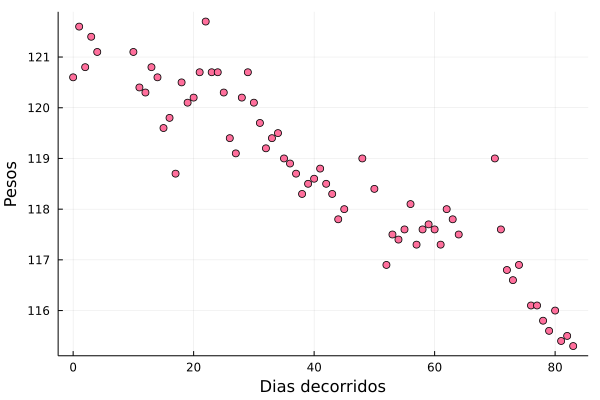

In [35]:
scatter(x, y, 
    color=:"#ff6f9c",
    lw=2,
    label=false,
    legend=:topright,
    xlabel="Dias decorridos",
    ylabel="Pesos"
)

Vamos precisar utilizar novamente nossa função de regressão passando os conjuntos x e y que criamos. Iremos utilizar a regressão de grau 1 porque percebemos o modelo linear já modela bem a situação:

In [36]:
# Regressão com grau = 1(reta)
c = regressao(x, y, 1)

# Polinômio de grau 1
f(x) = c[1] + c[2]x

f (generic function with 1 method)

Queremos saber quando o peso será 110, isto é, quando f(x) = 110:

$
110 = c[1] + c[2]x \\ 
x = \frac{110 - c[1]}{c[2]}
$

In [37]:
x = (110 - c[1])/c[2]

172.26753579630636

Isso nos indica que aproximadamente 172 dias após o primeiro dia de pesagem teremos encontrado o peso 110. Isto é, o peso será de 110 quilos no dia 16/04.

### Exercício 1.5 | Resolvendo um crime

_________________________________________________________________________________________________________________________________________________________________________________________

Queremos utilizar regressão com coeficientes não lineares para descobrir o horário do assassinato. Para isso, podemos utilizar algumas informações importantes que o enunciado nos dá. Podemos colocar as temperaturas em função do tempo e dessa forma considerar que $t = [0; 90; 150]$ é um conjunto de tempos e $T = [34; 30; 25]$ é o conjunto de temperaturas correspondente. É importante salientar que utilizamos o primeiro tempo como $0$ porque é o primeiro instante que temos informação. Dito isso, sabemos que devemos esperar encontrar um valor negativo para o momento do assassinato, já que ele ocorreu antes da primeira medição do corpo (devemos por isso somar o que encontrarmos ao tempo inicial).

Sabemos que a equação da Lei do Resfriamento de Newton é dada por:

$$T(t) = (T_0 - T_f) e^{-kt} + Tf$$

onde

$T$ é a temperatura do corpo em determinado instante

$T_0$ é a temperatura inicial do corpo

$T_f$ é a temperatura final do corpo

$t$ é o tempo 

$k$ é uma constante

Pelo enunciado, temos $T_f = 20$ e $T_0 = 34$. Queremos descobrir qual o valor da constante k para que consigamos determinar o horário do crime, já que sabemos que a temperatura normal do corpo T = 37. Porém a constante está no expoente de $e$, por isso teremos que recorrer ao método da regressão com coeficientes não lineares. Substituindo os dados que temos do enunciado na equação:

$$
T(t) = 14 e^{-kt} + 20 \\
T(t) - 20 = 14 e^{-kt}
$$

Aplicando $ln$ em ambos os lados para eliminar a exponencial:

$$
ln(T(t) - 20) = ln(14 e^{-kt}) \\
ln(T - 20) = ln(14) - kt
$$

Para utilizar a regressão com coeficientes lineares, vamos migrar para o "mundo barra", fazendo uma troca de variáveis:

$$
\overline{T} = ln(T - 20)\\
\overline{t} = t \\
\overline{c_1} = ln(14) \\
\overline{c_2} = -k 
$$

O que nos deixa com a seguinte equação no mundo barra:

$$\overline{T} = \overline{c_1} + \overline{c_2}\overline{t}$$

In [39]:
# função original: T(t) = 14 * exp(-k*t) + 20
t = [0; 90; 150] # tempos
T = [34; 30; 25] # temperaturas

# Dicionário (troca de variável) indo pro mundo barra
t_barra = t
T_barra = log.(T.-20)

# Regressão com grau = 1 no mundo barra para descobrirmos os valores dos coeficientes c1_barra e c2_barra
V = vandermonde(t_barra, 1)
c_barra = regressao(t_barra, T_barra, 1)

# O primeiro coeficiente é constante e o segundo é o coeficiente que acompanha x
c1_barra = c_barra[1]
c2_barra = c_barra[2]

print("c1_barra: ", c1_barra, "\n", "c2_barra: ", c2_barra)

c1_barra: 2.713083491111964
c2_barra: -0.0066173755762186995

Encontramos valores para $\overline{c_1}$ e $\overline{c_2}$. Já sabíamos que $\overline{c_1}$ é $ln(14) \approx 2,63$, mas como estamos usando regressão, que se trata de um método numérico, isso quer dizer que estamos encontrando uma aproximação para os valores. Considerando que temos um erro absoluto de aproximadamente $0,7$ se subtraírmos o valor de $ln(14)$ pelo valor que encontramos vemos que a aproximação está satisfatória.

Prosseguindo, pela nossa tabela de migração para o mundo barra, sabemos que $\overline{c_2} = -k$, logo teremos:

In [40]:
k = -c2_barra

0.0066173755762186995

Voltando na equação de resfriamento com os dados do enunciado temos que $T(t) = 14 e^{-kt} + 20$ e queremos saber o momento do assassinato, isso é, queremos o momento em que $T = 37$:

$37 = 14 e^{-kt} + 20 \\
\frac{17}{14} = e^{-kt} \\
ln(\frac{17}{14}) = -kt \\
t = -\frac{ln(\frac{17}{14})}{k}$

In [41]:
# Usando o valor de k que calculamos anteriormente
t = -log(17/14) / k

-29.34033473008676

Isso indica que o assassinato ocorreu por volta de $30$ minutos antes da primeira medição, que consideramos ser o ponto 0. Como a primeira medição ocorreu às 15h, temos 15:00 - 0:30 = 14:30. Logo, nesse caso, estimamos que o assassinato ocorreu por volta das 14:30.